<a href="https://colab.research.google.com/github/singhgaurav2323/CNN_working/blob/master/Dog_vs_cat__augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Downlaoding Data set**

**Heavy Dataset**

In [0]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"


In [0]:
import os 
import zipfile

zip_ref = zipfile.ZipFile('/tmp/cats-and-dogs.zip','r')
zip_ref.extractall('/tmp')
zip_ref.close()

But we are processing with the small data set as of limiitedt time processing capabitility.
so one can proceed with larger one to have more better trained machine.

**small dataset**

In [0]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2019-09-10 05:56:23--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   148MB/s    in 0.4s    

2019-09-10 05:56:29 (148 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os 
import zipfile

zip_ref = zipfile.ZipFile('/tmp/cats_and_dogs_filtered.zip','r')
zip_ref.extractall('/tmp')
zip_ref.close()

**Giving path of all dir**

In [0]:
train_dir = '/tmp/cats_and_dogs_filtered/train'
validation_dir = '/tmp/cats_and_dogs_filtered/validation'


#Directory with our training cat/dog pictures for small data set
train_cats_dir = '/tmp/cats_and_dogs_filtered/train/cats'
train_dogs_dir = '/tmp/cats_and_dogs_filtered/train/dogs'

# Directory with our validation cat/dog pictures
validation_cats_dir = '/tmp/cats_and_dogs_filtered/validation/cats'
validation_dogs_dir = '/tmp/cats_and_dogs_filtered/validation/dogs'

*checking path allotment*



In [0]:
# trainig set result allotment

print(os.listdir(train_cats_dir)[0:10])
print(os.listdir(train_dogs_dir)[0:10])

#testing set result allotment

print(os.listdir(validation_cats_dir)[0:10])
print(os.listdir(validation_dogs_dir)[0:10])

['cat.151.jpg', 'cat.310.jpg', 'cat.136.jpg', 'cat.75.jpg', 'cat.598.jpg', 'cat.1.jpg', 'cat.219.jpg', 'cat.629.jpg', 'cat.535.jpg', 'cat.650.jpg']
['dog.957.jpg', 'dog.842.jpg', 'dog.289.jpg', 'dog.879.jpg', 'dog.726.jpg', 'dog.432.jpg', 'dog.431.jpg', 'dog.968.jpg', 'dog.219.jpg', 'dog.785.jpg']
['cat.2071.jpg', 'cat.2287.jpg', 'cat.2466.jpg', 'cat.2300.jpg', 'cat.2092.jpg', 'cat.2489.jpg', 'cat.2479.jpg', 'cat.2031.jpg', 'cat.2434.jpg', 'cat.2352.jpg']
['dog.2412.jpg', 'dog.2293.jpg', 'dog.2296.jpg', 'dog.2026.jpg', 'dog.2073.jpg', 'dog.2285.jpg', 'dog.2029.jpg', 'dog.2193.jpg', 'dog.2230.jpg', 'dog.2137.jpg']


**Total number of training and testing image**

In [0]:
# trainig set result allotment

print("Total number of training cats image :" ,len(os.listdir(train_cats_dir)))
print("Total number of testing dogs image :" ,len(os.listdir(train_dogs_dir)))

#testing set result allotment

print("Total number of testing cats image :" ,len(os.listdir(validation_cats_dir)))
print("Total number of testing dogs image :" ,len(os.listdir(validation_dogs_dir)))

Total number of training cats image : 1000
Total number of testing dogs image : 1000
Total number of testing cats image : 500
Total number of testing dogs image : 500


**Showing some random images**

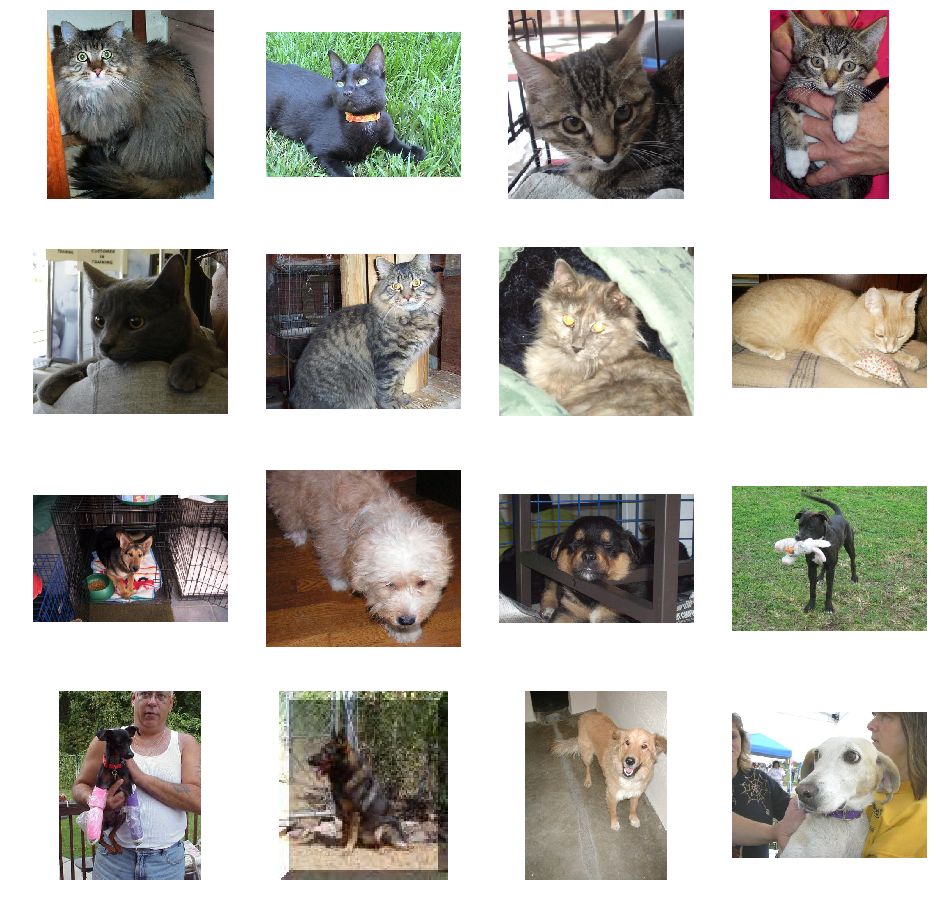

In [0]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


**Building Small model**

In [0]:
import tensorflow as tf



In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

**Preprocessing part**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=50,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=50,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Training**

for lage data set epoch set to 5 as of large timing act

In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=50,
                              verbose=1)

Epoch 1/10
100/100 [==============================] - 253s 3s/step - loss: 0.4283 - acc: 0.8001 - val_loss: 0.4458 - val_acc: 0.7860
Epoch 2/10
100/100 [==============================] - 251s 3s/step - loss: 0.2646 - acc: 0.8926 - val_loss: 0.5321 - val_acc: 0.7850
Epoch 3/10
100/100 [==============================] - 252s 3s/step - loss: 0.1309 - acc: 0.9557 - val_loss: 0.7060 - val_acc: 0.7890
Epoch 4/10
100/100 [==============================] - 253s 3s/step - loss: 0.0678 - acc: 0.9810 - val_loss: 0.7919 - val_acc: 0.7710
Epoch 5/10
100/100 [==============================] - 253s 3s/step - loss: 0.0643 - acc: 0.9891 - val_loss: 1.2037 - val_acc: 0.7760
Epoch 6/10
100/100 [==============================] - 253s 3s/step - loss: 0.1012 - acc: 0.9825 - val_loss: 1.1386 - val_acc: 0.7670
Epoch 7/10
100/100 [==============================] - 254s 3s/step - loss: 0.0733 - acc: 0.9909 - val_loss: 1.1595 - val_acc: 0.7630
Epoch 8/10
100/100 [==============================] - 254s 3s/step - 

# **Evaluation loss**

**for small training data set**

Text(0.5, 1.0, 'Training and validation loss')

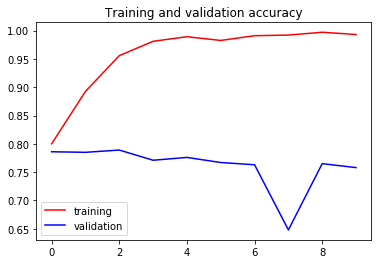

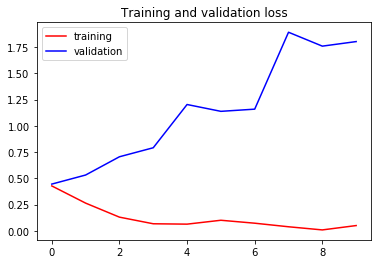

In [0]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs


# Plot training and validation accuracy per epoch

plt.plot  ( epochs,     acc , color='red'  ,label="training")
plt.plot  ( epochs, val_acc , color='blue' ,label="validation")
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()


# Plot training and validation loss per epoch

plt.plot  ( epochs,     loss ,color='red'  ,label="training")
plt.plot  ( epochs, val_loss ,color='blue' ,label="validation")
plt.legend()
plt.title ('Training and validation loss'   )

Now as clear from above results that the model is getting over fitted to some limited features .
Hence i am trying image augmentation to have better training with limited data set and the analyse the cahnges for the same model training and results.

# Image Augmentaionin preprocessing part of model

In [0]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)



In [0]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/10
100/100 - 66s - loss: 0.6444 - acc: 0.6655 - val_loss: 0.5376 - val_acc: 0.7270
Epoch 2/10
100/100 - 64s - loss: 0.6271 - acc: 0.6900 - val_loss: 0.5063 - val_acc: 0.7260
Epoch 3/10
100/100 - 65s - loss: 0.5978 - acc: 0.6830 - val_loss: 0.5210 - val_acc: 0.7400
Epoch 4/10
100/100 - 64s - loss: 0.6047 - acc: 0.6900 - val_loss: 0.5123 - val_acc: 0.7640
Epoch 5/10
100/100 - 64s - loss: 0.5946 - acc: 0.6995 - val_loss: 0.5211 - val_acc: 0.7570
Epoch 6/10
100/100 - 64s - loss: 0.5879 - acc: 0.7080 - val_loss: 0.5180 - val_acc: 0.7590
Epoch 7/10
100/100 - 64s - loss: 0.5857 - acc: 0.7115 - val_loss: 0.4816 - val_acc: 0.7590
Epoch 8/10
100/100 - 65s - loss: 0.5724 - acc: 0.7265 - val_loss: 0.5011 - val_acc: 0.7540
Epoch 9/10
100/100 - 65s - loss: 0.5710 - acc: 0.7125 - val_loss: 0.4930 - val_acc: 0.7590
Epoch 10/10
100/100 - 65s - loss: 0.5521 - acc: 0.7195 - val_loss: 0.4917 - val_acc: 0.7610


**Visualising the accuracy and the loss**

Text(0.5, 1.0, 'Training and validation loss')

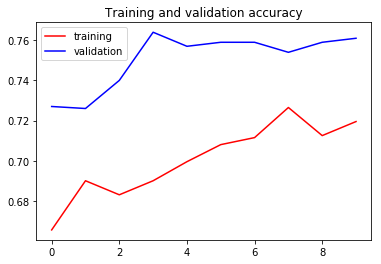

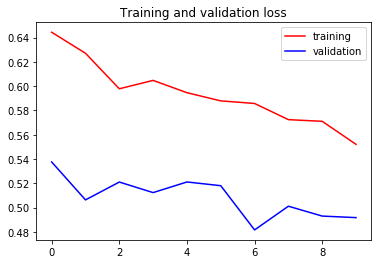

In [0]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs


# Plot training and validation accuracy per epoch

plt.plot  ( epochs,     acc , color='red'  ,label="training")
plt.plot  ( epochs, val_acc , color='blue' ,label="validation")
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()


# Plot training and validation loss per epoch

plt.plot  ( epochs,     loss ,color='red'  ,label="training")
plt.plot  ( epochs, val_loss ,color='blue' ,label="validation")
plt.legend()
plt.title ('Training and validation loss'   )

now here is the result looking for score of validation is more and loss is less than the training scenerio

**Checking the trained model**

In [0]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

**Visulasing the result**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in true_divide


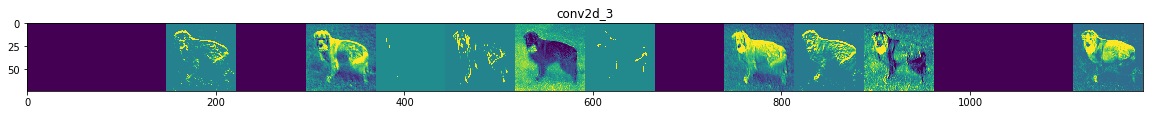

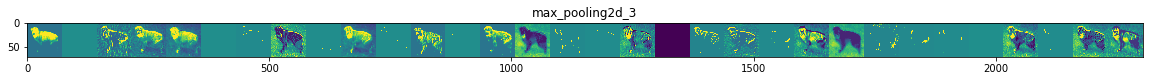

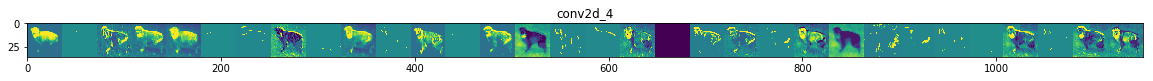

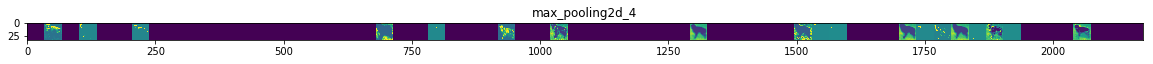

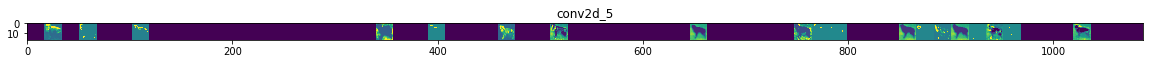

In [0]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

train_cats_dir = '/tmp/cats_and_dogs_filtered/train/cats'
train_dogs_dir = '/tmp/cats_and_dogs_filtered/train/dogs'

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )



# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

# Killing the Network

In [0]:
import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )